# Chapter 2
## Fourier series
### Preliminaries: Inner product of functions
Assume we have two functions $f(x)$ and $g(x)$, their inneer product $<f(x),g(x)>$ is defined as

$$
<f(x),g(x)> = \int_a^b f(x)\;\bar{g}(x)\;\;dx
$$

where $\bar{g}(x)$ is the complex conjugate of $g(x)$. This is the _function_ equivalent of the inner product between two vectors. The inner product of functions projects one onto the other and tells us how much of the first function we can retried in the direction of the second. Seeing this with a vector example is easier. Let's assume we have our two functions, $f(x)$ and $g(x)$, and to establish a connection with the inner product of vectors, let's now assume we sampled them at $\Delta x$ intervals, let's assume that, if the functions are defined over the interval $[a,b]$ and we sampled $n$ equispaced points in such interval ($\Delta x = \frac{b-a}{n-1}$) then we would observe a picture like the following.

<p align="center">
<img src="./figures/hermitianInnerProduct.png" width="600">
</p>

We can easily collect all the values for each function in a corresponding vector $\mathbf{f} = [f_1\;f_2\;\dots\;f_n]$ (and $\mathbf{g} = [g_1\;g_2\;\dots\;g_n]$). Now $\mathbf{f}$ and $\mathbf{g}$ are just vectors, so we can compute their inner product as

$$
<\mathbf{f},\mathbf{g}> = \sum_{i=1}^n f_i \;\bar{g}_i = \sum_{i=1}^n f(x_i)\;\bar{g}(x_i)
$$

In vector terms this is _just_ how much of $\mathbf{f}$ exists in the direction of $\mathbf{g}$! Is this the inner product of functions? Almost. There's one kink we need to iron out before the picture is perfect. That kink is the fact that a function has an infinite set of values in any domain where it is defined. Then we should now expect our inner product of functions to be dependent on the number of points $n$ we used to discretise the domain $[a,b]$. Then we have a problem, because the more points we use for the discretisation, the larger the number of addenda in the (vector) inner product, the larger the final result itself. How do we solve this? Well, we can simply _rescale_ by $\Delta x$

$$
\frac{b-a}{n-1} <\mathbf{f},\mathbf{g}>=\sum_{i=1}^n f(x_i)\;\bar{g}(x_i)\;\Delta x
$$

which is the Riemann approximation of the continuous function inner product, in fact this summation converges too the function inner product as $n \rightarrow \infty$. We can easily verify this with a simple simulation.

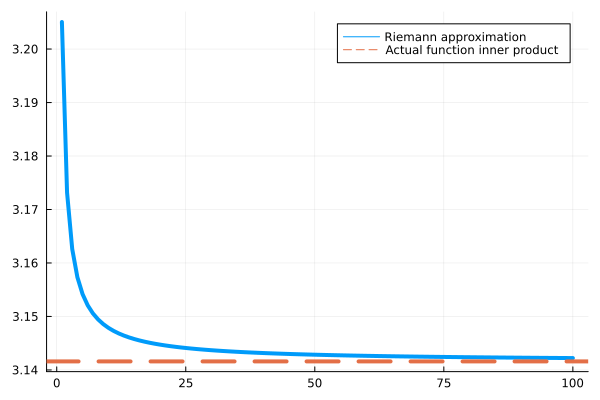

In [10]:
using Plots

function Dx(a, b, n)
    factor = (b - a) / (n - 1)
end

j = 1;
riemannApprox = similar(100.0:100.0:10000.0)
for n = 100:100:10000
    x = LinRange(-π, π, n)
    X = cos.(x)
    riemannApprox[j] = Dx(-pi, pi, n) * X' * X
    j = j + 1
end

plot(riemannApprox, label="Riemann approximation", linewidth=4)
hline!([π], label = "Actual function inner product", linewidth=4, linestyle=:dash)

Of note, the _norm 2_ of a function is defined on the inner product of the function with itself.

$$
||f(x)||_2=\sqrt{<f(x),f(x)>} = \sqrt{\int_a^b f(x)\;\bar{f}(x)\;dx}
$$

>_**NOTE**_ The set of functions with bounded norm $L^2([a,b])$ (i.e. functions which when squared have a finite integral between $[a,b]$) is called the set of Lebesgue integrable functions. 

What's the connection of all this to Fourier series? A Fourier series representation of a function $\mathbf{f}$ is precisely a projection of this function onto the orthogonal set of _sine_ and _cosine_ functions with integer period on the domain $[a, b]$.

## Fourier series
> _**NOTE**_ The Fourier series deals with **PERIODIC** functions, the Fourier Transform extends this to non periodic ones.

If $f(x)$ is (a) periodic and (b) piecewise smooth, then it can be written as:
$$
f(x) = \frac{a_0}{2}\sum_{k=1}^{\infty} a_k\;cos(k\;x) + b_k\;sin(k\;x)
$$
with
where $a_k$ and $b_k$ are called the _coefficients_ of the series and they are calculated as

$$
a_k = \frac{1}{||cos(x)||_2} \int_{-\pi}^{\pi} f(x)\;cos(k\;x) dx = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x)\;cos(k\;x) dx\\
b_k = \frac{1}{||sin(x)||_2} \int_{-\pi}^{\pi} f(x)\;sin(k\;x) dx = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x)\;sin(k\;x) dx
$$

which, in both cases, is equivalent to calculating the inner product of the function $f(x)$  with $cos(x)$ or $sin(x)$ (i.e. projecting $f(x)$ on the infinite many $cos(kx)$ and $sin(kx)$ for $k=[1,\dots, \infty]$).

> _**NOTE**_ Remember that, when you project the function onto the new (function) basis, you need to divide by the norm (2) of the function you are using as basis. You _automatically_ do this when you project on a unitary basis vector (e.g. $[0, 1]$ or $[1, 0]$)

Therefore we can re-interpret the Fourier series coefficients as the inner products of the original functions with the _infinitely dimensional_ orthogonal basis of sines and cosines of ever increasing frequencies.

$$
a_k = \frac{1}{||cos(kx)||_2} <f(x) cos(kx)> \\
b_k = \frac{1}{||sin(kx)||_2} <f(x) sin(kx)>
$$

Note that we assumed that $f(x)$ is periodic with period $2\pi$, what if instead $f(x)$ is periodic with perid $2L$? This is an easy extension: we can remember that the general foormulation of sine is $sin(2\pi k f x) = sin(2\pi k T^{-1} x) $ which in the case above was $sin(2\pi k (2 \pi)^{-1} x) = sin(k x)$. Then we can re-generalise our formulation of Fourier series above as:

$$
f(x) = \frac{a_0}{2}\sum_{k=1}^{\infty} a_k\;cos(2\pi(L)^{-1}k\;x) + b_k\;sin(2\pi(L)^{-1}k\;x) 
$$

where the coefficients of the series are now defined as

$$
a_k = \frac{L}{\pi} \int_{0}^{L} f(x)\;cos(\frac{2 \pi}{L} k\;x) dx\\
b_k = \frac{L}{\pi} \int_{0}^{L} f(x)\;sin(\frac{2 \pi}{L} k\;x) dx
$$

Remembering that $cos(kx) + i\;sin(kx) = e^{ikx}$ we can rewrite the Fourier series as

$$
f(x) = \sum_{k=- \infty}^{\infty} c_k\;e^{ikx} = \sum_{k=- \infty}^{\infty} (\alpha_k + i\;\beta_k)\;(cos(kx) + i\;sin(kx))
$$

Now, remember that $cos(x) = cos(-x)$ and $sin(x) = -sin(x)$ then we can write $a_{-k}=a_k$ and $b_{-k} = -b_k$. Then $c_{-k} = \bar{c}_k$. We will call the terms $e^{ikx} = \psi_k$ with $k \in \mathbb{Z}$ the components of the infinite dimensional orthogonal f|unction basis in the Fourier series.

We can easily show that:
- sines and cosines are indeed an orthogonal basis ($<\psi_j, \psi_k> = 0$ iff $j \neq k$)
- $c_k = \frac{1}{2 \pi} <f(x), \psi_{k}(x)> where $\frac{1}{2\pi}$ is the normalisation factor we need to take into account the norm of $e^{ikx}$.

### Fourier series example.
Let's assume we have a $2 \pi$-preiodic piecewise function defined as follows:

$$
f(x) = \begin{cases}
0 & \mathrm{for}\;x\;\mathrm{in}\; [-\pi, -\pi/2) \\
1 + 2x/\pi & \mathrm{for}\;x\;\mathrm{in}\; [-\pi/2, 0) \\
1 - 2x/\pi & \mathrm{for}\;x\;\mathrm{in}\; [0, \pi/2) \\
0 & \mathrm{for}\;x\;\mathrm{in}\; [\pi/2, \pi)
\end{cases}
$$

Let's assume that $L = \pi$ and that we sample at $dx = 0.001$ (then, a quartile of the the domain is equal to $2000/4$ points).

In [3]:
dx = 0.001
L = π
x = (-1+dx:dx:1).*L
n = length(x);
nquart = Int64(floor(n/4))

500

Let's now define the actual _hat function_

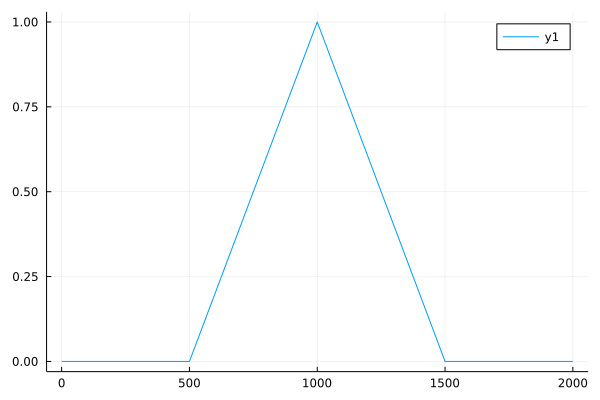

In [4]:
using Plots

f = zeros(2000)  #zeros everywhere 
f[nquart:2*nquart] = collect(4*(0:nquart)./n)   #up bit
f[2*nquart+1:3*nquart] = collect(1 .- (4*(1:(nquart))./n))  
plot(f)

Let's now compute the Fourier series. The first coefficients first.

$$
A_0 = <f, cos(0)> = <f, 1>
$$

In [5]:
A0=f'*ones(length(f))*dx
fFS = A0/2

0.25

Let's then compute the next (first) 20 coefficients

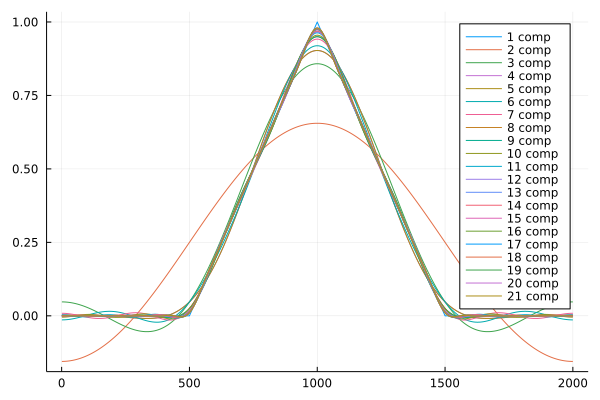

In [20]:
using LinearAlgebra

A = zeros(20)
B = zeros(20)
ERR = zeros(20)
fFS = A0/2

h = plot(f, label="1 comp")

for k in 1:20
    A[k] = f' * cos.(π .* k .* x ./ L) .* dx
    B[k] = f' * sin.(π .* k .* x ./ L) .* dx
    fFS = fFS .+ A[k] .* cos.(k * π .* x ./ L) + B[k] .* sin.(k * π .* x ./ L) # reconstruction
    ERR[k] = norm(f-fFS)/norm(f) # reconstruction error
    h=plot!(h, fFS, label=string.(k+1)*" comp")
end

display(h)

Let's plot the coefficients of the series and the reconstruction error for the first 100 terms of the expansion.

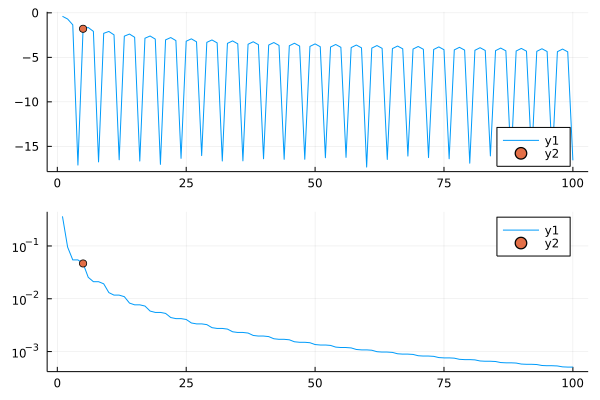

In [7]:
A = zeros(100)
B = zeros(100)
ERR = zeros(100)
fFS = A0/2

for k in 1:100
    A[k] = f' * cos.(π .* k .* x ./ L) .* dx
    B[k] = f' * sin.(π .* k .* x ./ L) .* dx
    fFS = fFS .+ A[k] .* cos.(k * π .* x ./ L) + B[k] .* sin.(k * π .* x ./ L) # reconstruction
    ERR[k] = norm(f-fFS)/norm(f) # reconstruction error
end


p1 = plot(log10.(abs.(A)))
p1 = scatter!(p1, [5], [log10(A[5])], legend=:bottomright)
p2 = plot(ERR, yaxis=:log10)
p2 = scatter!(p2, [5], [(ERR[5])], yaxis=:log10)

plot(
    p1,
    p2, 
    layout=(2,1)
)


We can also see that the signal we reconstruct is indeed $2 \pi$ periodic.

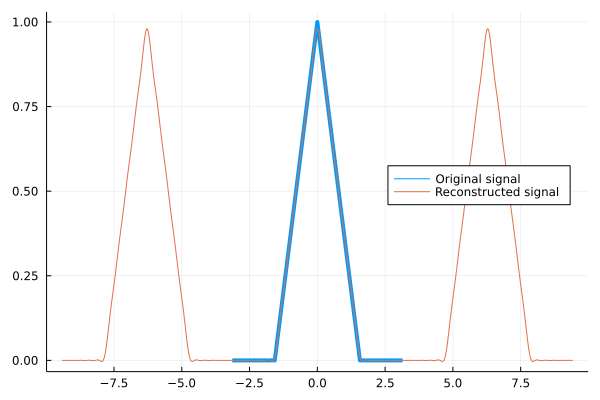

In [13]:
x2 = (-3+dx:dx:3).*L # new domain, not the original one, just to make the point
fFS = A0/2 # resetting the initial 
h = plot(x, f, linewidth=4, label="Original signal")

for k in 1:20
    fFS = fFS .+ A[k] .* cos.(k * π .* x2 ./ L) + B[k] .* sin.(k * π .* x2 ./ L) # reconstruction
    if k == 20
        h=plot!(h, x2, fFS, label="Reconstructed signal", legend=:right)
    end
end
display(h)

### Fourier series example: discontinuous functions

The function in the previous example is continuous (just its first derivative its discontinous). What if we want to expand in a Fourier Series a discontinuous function? Interesting things happen in this case -consider: how would the Fourier Series approximate the discontinuity?

To develop an intuition around this, let's consider a _flat hat_ function, rather than a _pointy hat_ one:

$$
f(x) = \begin{cases}
0 & \mathrm{for}\;x\;\mathrm{in}\; [1, L/4) \\
1 & \mathrm{for}\;x\;\mathrm{in}\; [L/4, 3 L/4) \\
0 & \mathrm{for}\;x\;\mathrm{in}\; [3L/4, L)
\end{cases}
$$
